In [105]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import numpy as np
from matplotlib import rc
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.lines as mlines
import matplotlib.ticker as ticker

plt.rcParams["font.family"] = 'CMU Concrete'

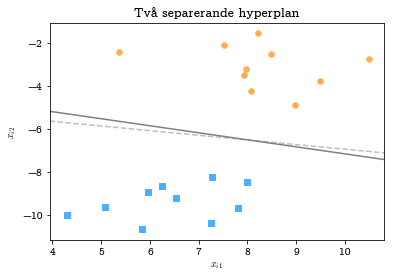

In [45]:
X, y = make_blobs(n_samples=20, centers=2, random_state=6)
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)
clf2 = svm.SVC(kernel='linear', C=0.005)
clf2.fit(X,y)

X0, y0 = [], []
X1, y1 = [], []
for i in range(20):
    if y[i]==0:
        X0.append(X[i, :])
        y0.append(y[i])
    else:
        X1.append(X[i, :])
        y1.append(y[i])
X0 = np.reshape(X0, newshape=(10,2))
X1 = np.reshape(X1, newshape=(10,2))

plt.scatter(X0[:, 0], X0[:, 1], c="#ffaf4b", s=30, marker='o')
plt.scatter(X1[:, 0], X1[:, 1], c="#4bafff", s=30, marker='s')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
Z2 = clf2.decision_function(xy).reshape(XX.shape)
#ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
#           linestyles=['--', '-', '--'])

ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])
ax.contour(XX, YY, Z2, colors='grey', levels=[0], alpha=0.5,
           linestyles=['--'])

#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')
plt.title("Två separerande hyperplan")
plt.xlabel(r'$x_{i1}$')
plt.ylabel(r'$x_{i2}$')

pp = PdfPages('KandFigur1.pdf')
plt.savefig(pp, format='pdf')
pp.close()

#plt.show()

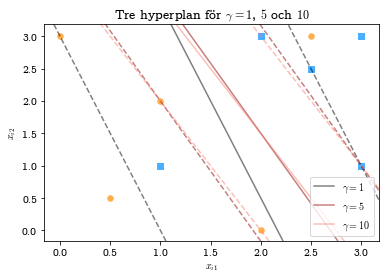

In [93]:
X = np.reshape([[2,3], [2.5,2.5], [3,1], [3,3], [0,3], [1,2], [2,0], [0.5,0.5], [2.5,3], [1,1]], newshape=(10,2))
y = [1,1,1,1,0,0,0,0,0,1]
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)
clf2 = svm.SVC(kernel='linear', C=5)
clf2.fit(X, y)
clf3 = svm.SVC(kernel='linear', C=10)
clf3.fit(X, y)


X0, y0 = [], []
X1, y1 = [], []
for i in range(10):
    if y[i]==0:
        X0.append(X[i, :])
        y0.append(y[i])
    else:
        X1.append(X[i, :])
        y1.append(y[i])
X0 = np.reshape(X0, newshape=(5,2))
X1 = np.reshape(X1, newshape=(5,2))

plt.scatter(X0[:, 0], X0[:, 1], c="#ffaf4b", s=30, marker='o')
plt.scatter(X1[:, 0], X1[:, 1], c="#4bafff", s=30, marker='s')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
Z2 = clf2.decision_function(xy).reshape(XX.shape)
Z3 = clf3.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.contour(XX, YY, Z2, colors='darkred', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.contour(XX, YY, Z3, colors='salmon', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

#ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
#           linestyles=['-'])

#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')
#ax.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')
#ax.scatter(clf3.support_vectors_[:, 0], clf3.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')

plt.title(r"Tre hyperplan för $\gamma=1$, $5$ och $10$")
plt.xlabel(r'$x_{i1}$')
plt.ylabel(r'$x_{i2}$')


gamma1 = mlines.Line2D([], [], color='black', alpha=0.5, label=r'$\gamma=1$')
gamma5 = mlines.Line2D([], [], color='darkred', alpha=0.5, label=r'$\gamma=5$')
gamma10 = mlines.Line2D([], [], color='salmon', alpha=0.5, label=r'$\gamma=10$')

plt.legend(handles=[gamma1, gamma5, gamma10])

pp = PdfPages('KandFigur2.pdf')
plt.savefig(pp, format='pdf')
pp.close()

#plt.show()

In [103]:
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    #ax.patch.set_alpha(0.0)

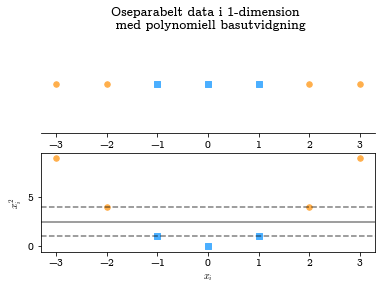

In [112]:
X = np.reshape([[-3,0],[-2,0],[-1,0],[0,0],[1,0],[2,0],[3,0]], newshape=(7,2))
y = [0,0,1,1,1,0,0]

X0, y0 = [], []
X1, y1 = [], []
for i in range(7):
    if y[i]==0:
        X0.append(X[i, :])
        y0.append(y[i])
    else:
        X1.append(X[i, :])
        y1.append(y[i])
X0 = np.reshape(X0, newshape=(4,2))
X1 = np.reshape(X1, newshape=(3,2))

plot = plt.figure()

ax = plt.subplot(2, 1, 1)
setup(ax)

plt.title("Oseparabelt data i 1-dimension \n med polynomiell basutvidgning")
plt.xlabel(r'$x_{i}$')

plt.scatter(X0[:, 0], X0[:, 1], c="#ffaf4b", s=30, marker='o')
plt.scatter(X1[:, 0], X1[:, 1], c="#4bafff", s=30, marker='s')
xlim = ax.get_xlim()
ylim = ax.get_ylim()


ax = plt.subplot(2, 1, 2)
X[:, 1] = X[:,0] * X[:,0]

clf = svm.SVC(kernel='linear', C=10000)
clf.fit(X, y)

X0, y0 = [], []
X1, y1 = [], []
for i in range(7):
    if y[i]==0:
        X0.append(X[i, :])
        y0.append(y[i])
    else:
        X1.append(X[i, :])
        y1.append(y[i])
X0 = np.reshape(X0, newshape=(4,2))
X1 = np.reshape(X1, newshape=(3,2))

plt.scatter(X0[:, 0], X0[:, 1], c="#ffaf4b", s=30, marker='o')
plt.scatter(X1[:, 0], X1[:, 1], c="#4bafff", s=30, marker='s')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
Z2 = clf2.decision_function(xy).reshape(XX.shape)
Z3 = clf3.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

#ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
#           linestyles=['-'])

#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')
#ax.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')
#ax.scatter(clf3.support_vectors_[:, 0], clf3.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')

plt.xlabel(r'$x_{i}$')
plt.ylabel(r'$x_{i}^{2}$')
#plt.title()

gamma1 = mlines.Line2D([], [], color='black', alpha=0.5, label=r'$\gamma=1$')
#gamma5 = mlines.Line2D([], [], color='darkred', alpha=0.5, label=r'$\gamma=5$')
#gamma10 = mlines.Line2D([], [], color='salmon', alpha=0.5, label=r'$\gamma=10$')

#plt.legend(handles=[gamma1, gamma5, gamma10])

pp = PdfPages('KandFigur3.pdf')
plt.savefig(pp, format='pdf')
pp.close()

#plt.show()